![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fórmulas adaptativas

O problema maior da integração é que, ao diminuir $h$, aumentamos o tempo de cálculo.
O que gostaríamos de fazer é, então, poder variar $h$ ao longo do algoritmo,
em função do intervalo que estejamos calculando.

Ou seja, vamos ter que achar, dependendo da função, os valores de $h$ "certos".
Mais ainda, gostaríamos que o método fosse "de passo variável":
isso permite "dar um zoom" quando a função variar muito (segunda ou quarta derivada de $f$,
dependendo de usar ponto médio ou Simpson)

## Recursão, o retorno

Uma solução para este problema é recursiva

1. Tomamos um intervalo $I$ sobre o qual vamos calcular uma "boa" aproximação da integral
2. Usamos alguma fórmula para calcular sua aproximação $A$
3. Usamos outra fórmula, teóricamente mais precisa, para calcular uma segunda aproximação $A'$.
4. Com $A$ e $A'$, podemos estimar o **erro** cometido pelas integrais
    1. Se ambas aproximações estiverem próximas, o erro deve ser pequeno, e usamos $A'$.
    2. Senão, dividimos o intervalo em duas partes (esquerda e direita, olhaí a bisseção) $I_e$ e $I_d$,
       calculamos ambas as integrais com precisão suficiente, e usamos a soma.

In [2]:
def simpson_adaptativo(f, a,b, tol=1e-6):
    ### Resposta aqui


In [3]:
simpson_adaptativo(np.sin, 0,10)

1.8390715313050514

In [4]:
ans = 1 - np.cos(10)
_ - ans

2.2285988610093455e-09

In [5]:
simpson_adaptativo(np.sin, 0,10, tol=1e-10)

1.8390715290768667

In [6]:
ans = 1 - np.cos(10)
_ - ans

4.1411318818518339e-13

### Evitando calcular demais

Uma otimização importante seria não recalcular a função nos pontos que já foram utilizados anteriormente.
Isso quer dizer que temos que "passar mais informação" na recursão.

Também, podemos modificar a função para que ela retorne o número de pontos em que calculamos `f`.

In [7]:
### Resposta aqui


In [8]:
simpson_adaptativo(np.sin,0,1)

(0.4596978890854006, 13)

In [9]:
ans = 1 - np.cos(1)
ans - _[0]

-1.9495354036669355e-07

### Exercício

Faça um gráfico com o número de passos necessários
para calcular as integrais de $f$ e $g$ com precisões cada vez melhores.
Depois, tente incorporar $h$, que é mais dificíl de integrar.

In [10]:
def f(x): return np.sin(x)
def g(x): return np.exp(-x**2)
def h(x): return np.exp(x**3)

In [11]:
# Sugestões de tolerâncias
tols = np.logspace(-40,-10, base=2)

# Faça aqui f e g
### Resposta aqui


In [12]:
# E aqui h.  Use outras tolerâncias...
### Resposta aqui


In [13]:
# Calculando valores "exatos" ;-)
from integrals import simpson
true_F = 2
true_G = simpson(g,0,1,10**5)
true_H = simpson(h,2,4,10**5)

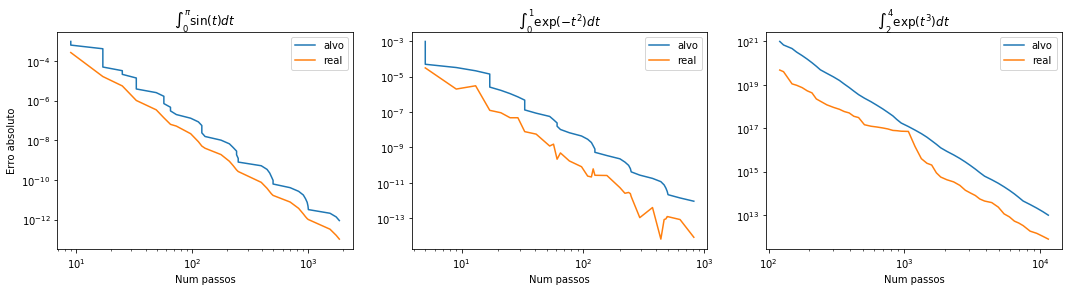

In [14]:
# E agora, os gráficos!
_, [ax1,ax2,ax3] = plt.subplots(ncols=3, figsize=(18,4))

### Resposta aqui


plt.show()